## Part 0

* One of the business cases we came up with, would be some form of salesman from a company. As a business person from a company talks to clients in order to sell a product. Based on their conversation and the recipients frequency and change of frequency & emotion in their voice, we could determine whether the person is resillient to make a purchase if we run the recipients voice-recording through an Machine Learning Algorithm after the call/conversation.

* Another business case would be to a gender related study. This could be a survey at work or any form of research/information gathering organization. This could forexample be used in Politics to determine the %-rates of Male & Female "voice/speech"-participation during fx. A Parliament meeting.

* Third and last business case for our project would be an unethical study to detect "un-closeted"-"closet-dudes". This would require to actually find a "dude" that meets the above-mentioned requirements and train our model based on, without them knowing that we're recording their voice. The "dude" based to train the model on would play a crucial role, so we don't encounter a false positive. Overall this would help us determine if people that haven't "un-closeted" themselves, actually is still in the "closet", without them knowing. The "stealth factor" in this approach would help to bring in the best results.

## Part 1

In [2]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

data = pd.read_csv('voice.csv')

data.info()

Populating the interactive namespace from numpy and matplotlib
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


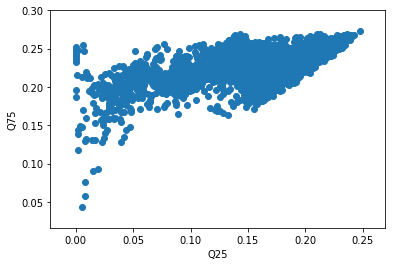

In [2]:
plt.scatter(data['Q25'], data['Q75'])
plt.xlabel('Q25')
plt.ylabel('Q75')
plt.show()

We can see that the first and third quantile are correlated, in the way that the higher the first quantile value is, the more closer the third one is to it.

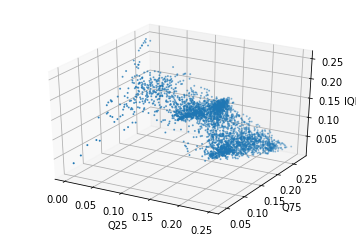

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Q25')
ax.set_ylabel('Q75')
ax.set_zlabel('IQR')
ax.scatter(data['Q25'], data['Q75'], data['IQR'], zdir='z', s=1)

The 3d plot tells us that our data finds itself primarily on one of 3 levels, depending on the IQR and Q25.

The Q75 values are primarily in the same range for all the dataset.

If the IQR is low, Q25 is between 0.15 and 0.25. If the IQR is median, the QR25 is between 0.10 and 0.15. If the IQR is high, the QR25 is between 0 and 0.10, with a smaller number of points in this range.

What this tells us about our data, and the way it is correlated, is that if a recording starts off at a lower frequency in the first quantile, it will have a higher IQR (because it's a range), as the recording will cover a larger range of frequencies. The IQR seems to be lower in most of our data, which means that most recordings end and begin at a pretty close frequency, and the overall IQR is between 0.05 and 0.10.

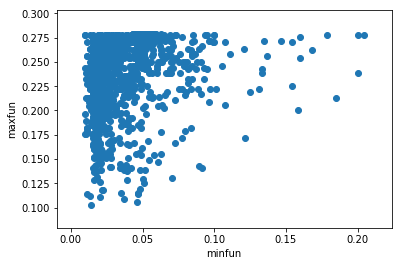

In [4]:
plt.scatter(data['minfun'], data['maxfun'])
plt.xlabel('minfun')
plt.ylabel('maxfun')
plt.show()

From this plot we see that most of our data has a big to medium maxfun and a small minfun.

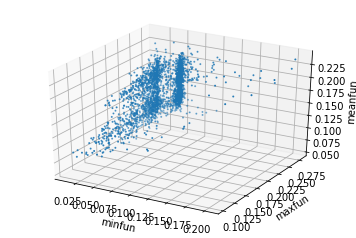

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('minfun')
ax.set_ylabel('maxfun')
ax.set_zlabel('meanfun')
ax.scatter(data['minfun'], data['maxfun'], data['meanfun'], zdir='z', s=1)

When we include the meanfun we can see that our data concentrates primarily in 2 points where the minfun and maxfun are almost the same values, but the meanfun changes a lot for these 2 clusters, and is almost making 2 parallel lines that the meanfun in varying on.

This proves there is a correlation to the meanfreq varying on a specific combination of minfun and maxfun.

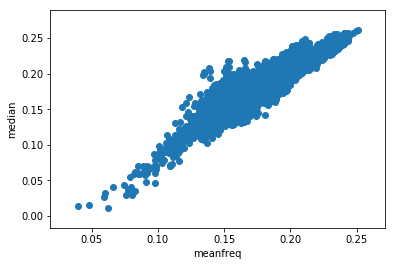

In [6]:
plt.scatter(data['meanfreq'], data['median'])
plt.xlabel('meanfreq')
plt.ylabel('median')
plt.show()

This plot shows us that the meanfreq and median freq are correlated, as the grow almost at the same rate.

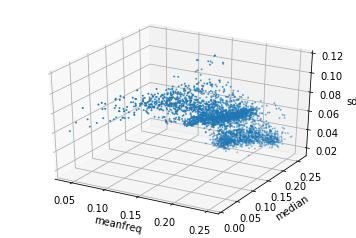

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('meanfreq')
ax.set_ylabel('median')
ax.set_zlabel('sd')
ax.scatter(data['meanfreq'], data['median'], data['sd'], zdir='z', s=1)

This plot looks very similar to the one on the quantiles and their range.

We assume this is because the standard deviation of frequency acts in the same way the IQR did: as a range that separates the dataset into levels. We can see 3 levels in this graph as well.

In this case, because the mean frequency is affected by outliers, you can see that it is affected when the standard deviation of frequency is higher, which is in alignment with our understanding and expectations.

This data is also correlated, as you can expect to have the mean frequency be lower when the standard deviation is higher, while the median almost always stays in the same approximate range.


We thought it would be most interesting to plot features that we assume are correlated, yet there are features that are intuitevely obviously not correlated, like spectral flatness and IQR. This is probably due to the naturality of, that some features have to be negative for others to be positive, which makes some features have less to none value for the overall model. 

Our conclusion is that this dataset contains a lot of features, as to describe the data as accurately as possible, and if we are to drop features, we should take correlation into account, and also try to start by dropping the features that describe the data the slightest before the ones that describe the best. 

Now that we have resolved to using the heatmap instead of doing manual labour by checking each pair of features correlation, we can now do exactly that, following the next step below. 

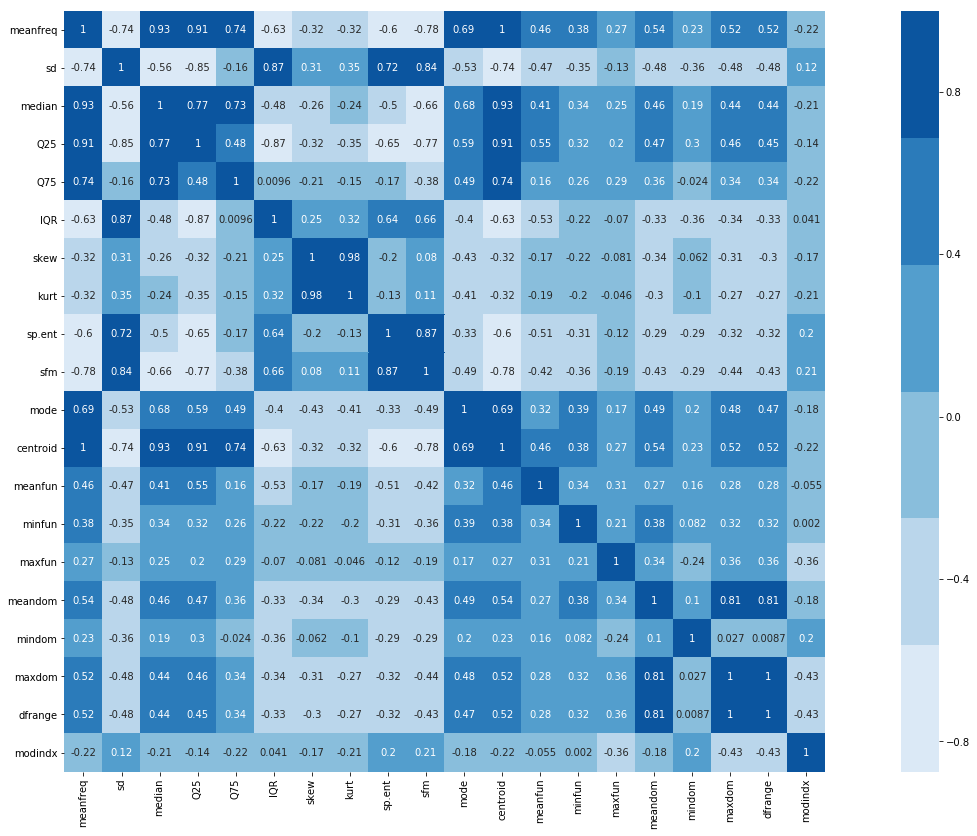

In [9]:
fig, ax = plt.subplots(figsize=(27,14))
sns.heatmap(data.corr(),vmax=1, square=True, cmap=sns.color_palette("Blues") , annot=True, ax=ax)

## Part 2

### Part 2.1 - kNN 

In [3]:
from sklearn.neighbors import KNeighborsClassifier 

x = data.drop(['label','sfm', 'skew', 'sp.ent', 'sd','centroid'], axis = 1) 
y = data.label

In [51]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

pipeline1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
ten_scores = cross_val_score(pipeline1, x, y, cv = 10) 
sum(ten_scores/len(ten_scores))

0.9577521694132632

Here we see that the mean value of our kNN is just about ~0.54% more accurate, with the features that we decided to drop, based on the fact of which features looked to be affecting the classifier the most. The result mean value is compared to our kNN model that we trained in Project 2. 

### Part 2.2 - Keras Neural Networks 

In [23]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Split features and labels
y = LabelEncoder().fit_transform(data.iloc[:, -1])

#Preprocessess data
scaler = StandardScaler()
x = scaler.fit_transform(x)

#Test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=30)

y_train = to_categorical(y_train, 2)


#Build Neural Network

model = models.Sequential([
  layers.Dense(1000, activation='relu', input_shape=(15,)),
  layers.Dense(1000, activation='relu'),
  layers.Dense(1000, activation='relu'),
  layers.Dense(1000, activation='relu'),
  layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=40,)

Train on 2565 samples, validate on 286 samples
Epoch 1/10
2565/2565 [==============================] - 6s 2ms/step - loss: 0.1374 - acc: 0.9520 - val_loss: 0.1669 - val_acc: 0.9685
Epoch 2/10
2565/2565 [==============================] - 6s 2ms/step - loss: 0.0700 - acc: 0.9762 - val_loss: 0.1773 - val_acc: 0.9650
Epoch 3/10
2565/2565 [==============================] - 6s 2ms/step - loss: 0.0633 - acc: 0.9782 - val_loss: 0.1511 - val_acc: 0.9685
Epoch 4/10
2565/2565 [==============================] - 5s 2ms/step - loss: 0.0504 - acc: 0.9766 - val_loss: 0.1486 - val_acc: 0.9580
Epoch 5/10
2565/2565 [==============================] - 6s 2ms/step - loss: 0.0561 - acc: 0.9778 - val_loss: 0.1827 - val_acc: 0.9580
Epoch 6/10
2565/2565 [==============================] - 6s 2ms/step - loss: 0.0518 - acc: 0.9801 - val_loss: 0.1562 - val_acc: 0.9720
Epoch 7/10
2565/2565 [==============================] - 6s 2ms/step - loss: 0.0403 - acc: 0.9867 - val_loss: 0.2032 - val_acc: 0.9650
Epoch 8/10
2565

In [27]:
model.evaluate(x_test, to_categorical(y_test, 2))

317/317 [==============================] - 0s 234us/step


[0.08695163081873103, 0.9779179814486098]

## Part 3

* Excluded/included features?


* Experimentation with the curse of dimensionality?

* 80/20, 50/50, or other, splitting?

* Splits: stratified, random, ...?

* did you do ensemble learning like bagging, boosting?

### Part 3.1 